# I. Exploratory Data Analysis and Quality Report

In [247]:
# importing libraries
import os
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.linear_model as linear_model
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from os import system
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
from yellowbrick.classifier import ClassificationReport, ROCAUC
from sklearn.linear_model import LinearRegression #importing logistic regression
import warnings
warnings.filterwarnings('ignore')

(1030, 9)
False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None
               count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80 

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


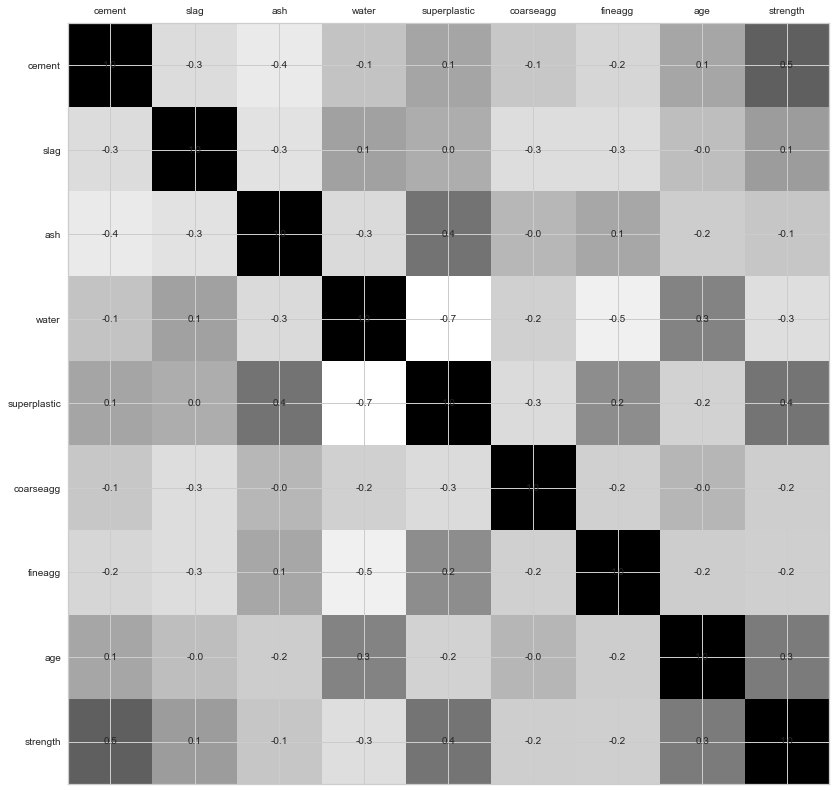

In [248]:
# Importing data
#os.getcwd()
data=pd.read_csv('../Data/concrete.csv')
columns = data.columns

'''Data consists of ingredients of concrete (cement, fly ash etc) in kg/m3 as the independent variables'''
'''The target variable is strength (compressive) in MPa '''
# a. Univariate analysis
print(data.shape) # Number of rows and columns in the dataframe
print(data.isnull().values.any()) # To check for null values in the dataframe
print(data.info()) # To check the data type of the columns of the dataframe
print(data.describe().T) # To review the statistical summary of the dataframe

# b. Bivariate analysis
print('Bivariate analysis\n')
corr = data.corr()
fig, ax = plt.subplots(figsize=(14, 14))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
for (i, j), z in np.ndenumerate(corr):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
data.head()

#### Insight: It can be observed that the strength of concrete is more co-related with amount of cement, superplastic and age as compared to other numerical variables

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64


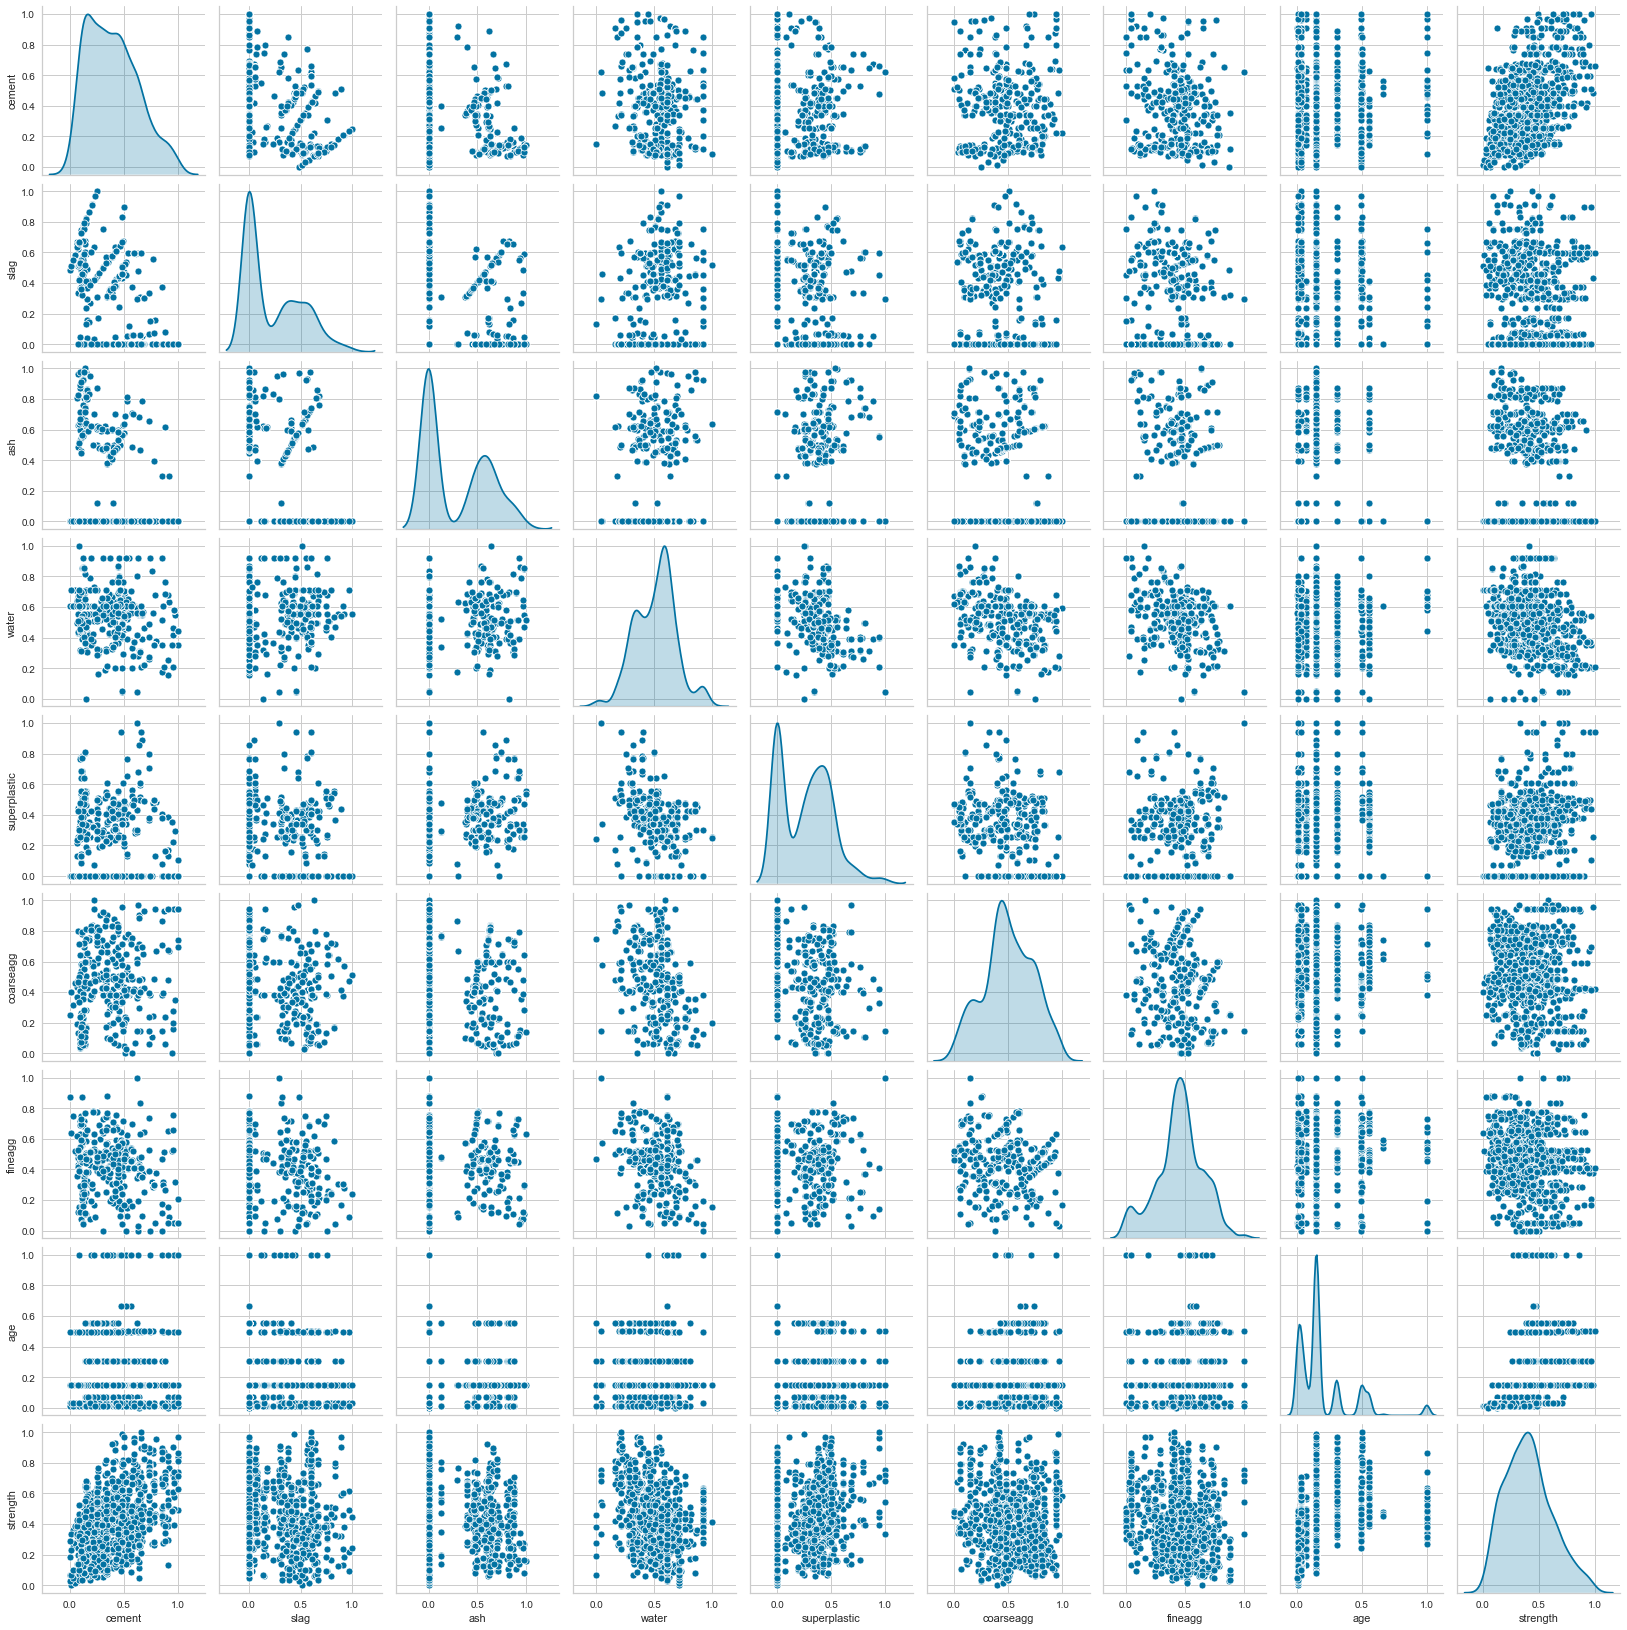

In [238]:
# View distribution of numerical variables
print(data.skew())
skew = data.skew()
sns.pairplot(data_filt, diag_kind='kde')

#### Insight: All the numerical variables do not show acute skewness. The age variable is comparitively more skewed (positive) than other variables

<AxesSubplot:xlabel='strength'>

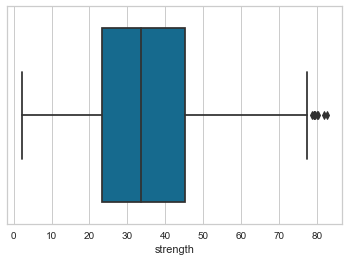

In [217]:
# Removing outliers from the data
#sns.boxplot(data['strength'])
data_filt = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
sns.boxplot(data_filt['strength'])

In [234]:
scaler = MinMaxScaler()
columns_new = data.columns
data_filt[columns_new] = scaler.fit_transform(data_filt[columns_new].to_numpy())
data_filt.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0.089726,0.670674,0.000000,0.709201,0.000000,0.496512,0.387607,0.150838,0.343341
1,0.152740,0.133502,0.621189,0.316840,0.461538,0.813372,0.507275,0.072626,0.263859
2,0.337900,0.000000,0.478261,0.569444,0.235043,0.453198,0.670346,0.150838,0.334994
3,0.374429,0.360645,0.000000,0.921875,0.000000,0.380814,0.190667,0.150838,0.542170
4,0.120548,0.580196,0.000000,0.620660,0.388889,0.716279,0.257652,0.150838,0.198829


In [245]:
X=data_filt.drop(['strength'], axis=1)
Y=data_filt.strength
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)
x_train

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
75,0.908676,0.000000,0.000000,0.678819,0.000000,0.941860,0.047667,0.072626
934,0.673516,0.000000,0.000000,0.554687,0.000000,0.696512,0.351982,0.150838
392,0.737443,0.336286,0.000000,0.275174,0.705128,0.148547,0.735324,0.033520
993,0.785388,0.075925,0.394803,0.348958,0.495726,0.482558,0.296036,0.011173
774,0.252511,0.000000,0.501749,0.326389,0.444444,0.589535,0.777220,0.307263
...,...,...,...,...,...,...,...,...
607,0.146347,0.000000,0.816092,0.474826,0.192308,0.748837,0.466884,0.553073
526,0.908676,0.000000,0.000000,0.678819,0.000000,0.941860,0.047667,0.011173
562,0.965753,0.000000,0.000000,0.583333,0.000000,0.941860,0.047667,0.033520
206,0.078539,0.511231,0.628686,0.432292,0.444444,0.353488,0.427496,0.150838


In [246]:
lr = LinearRegression()
lr.fit(x_train, y_train)

pred = lr.predict(x_test)  # Predictions from logistic regression
score_train = lr.score(x_train, y_train)
score_test = lr.score(x_test, y_test)
score_test

0.7146779844476875

#### Feature Selection

In [258]:
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures( degree = 2, include_bias = False) 
xpoly_train = poly.fit_transform(x_train)
lr_poly = lr.fit(xpoly_train, y_train)
lr_poly.score(xpoly_train, y_train)

0.8570432785727102